In [87]:
import pandas as pd
import matplotlib.pyplot as plt

In [88]:


# Specify the file path of the CSV dataset
file_path = '../assets/data/basic_dataset/'

# Load the CSV dataset into a dataframe
df_death = pd.read_json(file_path + 'gun-deaths-by-country-2024.json')
df_gun = pd.read_json(file_path + 'gun-ownership-by-country-2024.json')

# Display the dataframe
display(df_death.head())
display(df_gun.head())
print(df_death.shape)
display(df_gun.shape)



,country,GunDeathsAllCausesTotal2019,totalRate,shareOfDeaths,GunDeathsViolentTotal2019,GunDeathsViolentPct2019,GunDeathsViolentRatePer100k2019,gunViolenceByCountry_suicidesPer100k
0,India,14711.0,1.020379,5.896098,7977.0,0.08,0.57,1.0
1,China,1126.0,0.079008,0.451295,334.0,0.00,0.02,0.0
2,United States,37040.0,10.836289,14.845453,13001.0,0.44,3.96,6.0
3,Indonesia,439.0,0.156899,0.175949,153.0,0.01,0.06,0.0
4,Pakistan,2948.0,1.202236,1.181544,1721.0,0.11,0.77,0.0


,country,gunOwnershipByCountry_firearms,gunOwnershipByCountry_per100,gunOwnershipByCountry_military,gunOwnershipByCountry_lawEnf
0,India,71101000,5.3,3900000.0,1700000.0
1,China,49735000,3.6,27466400.0,1971000.0
2,United States,393347000,120.5,4535380.0,1016000.0
3,Indonesia,82000,0.0,1711450.0,429000.0
4,Pakistan,43917000,22.3,2315480.0,944000.0


(205, 8)


(217, 5)

In [89]:
df_death['GunDeathsViolentRatePer100k2019'].describe()

count    204.000000
mean       2.925686
std        5.775813
min        0.010000
25%        0.280000
50%        0.780000
75%        2.472500
max       36.780000
Name: GunDeathsViolentRatePer100k2019, dtype: float64

In [90]:
# Merge the two dataframes on the 'country' column on an inner join because we want to keep only the rows that have a match in both dataframes
merged_df = pd.merge(df_death, df_gun, on='country', how='inner')

display(merged_df.head())
print(merged_df.shape)

,country,GunDeathsAllCausesTotal2019,totalRate,shareOfDeaths,GunDeathsViolentTotal2019,GunDeathsViolentPct2019,GunDeathsViolentRatePer100k2019,gunViolenceByCountry_suicidesPer100k,gunOwnershipByCountry_firearms,gunOwnershipByCountry_per100,gunOwnershipByCountry_military,gunOwnershipByCountry_lawEnf
0,India,14711.0,1.020379,5.896098,7977.0,0.08,0.57,1.0,71101000,5.3,3900000.0,1700000.0
1,China,1126.0,0.079008,0.451295,334.0,0.00,0.02,0.0,49735000,3.6,27466400.0,1971000.0
2,United States,37040.0,10.836289,14.845453,13001.0,0.44,3.96,6.0,393347000,120.5,4535380.0,1016000.0
3,Indonesia,439.0,0.156899,0.175949,153.0,0.01,0.06,0.0,82000,0.0,1711450.0,429000.0
4,Pakistan,2948.0,1.202236,1.181544,1721.0,0.11,0.77,0.0,43917000,22.3,2315480.0,944000.0


(198, 12)


In [91]:
#we are checking for missing values in the dataset

missing_values = merged_df.isnull().sum()
missing_percentage = (missing_values / len(merged_df)) * 100
missing_data = pd.DataFrame({'Column': merged_df.columns, 'Missing Values': missing_values, 'Missing Percentage': missing_percentage})
missing_data


,Column,Missing Values,Missing Percentage
country,country,0,0.000000
GunDeathsAllCausesTotal2019,GunDeathsAllCausesTotal2019,0,0.000000
totalRate,totalRate,6,3.030303
shareOfDeaths,shareOfDeaths,6,3.030303
GunDeathsViolentTotal2019,GunDeathsViolentTotal2019,1,0.505051
GunDeathsViolentPct2019,GunDeathsViolentPct2019,0,0.000000
GunDeathsViolentRatePer100k2019,GunDeathsViolentRatePer100k2019,0,0.000000
gunViolenceByCountry_suicidesPer100k,gunViolenceByCountry_suicidesPer100k,8,4.040404
gunOwnershipByCountry_firearms,gunOwnershipByCountry_firearms,0,0.000000
gunOwnershipByCountry_per100,gunOwnershipByCountry_per100,0,0.000000


In [92]:
# we check if there are any duplicate countries in the dataset
#and we can see that there are no duplicate countries in the dataset
duplicate_countries = merged_df['country'].duplicated().any()
print(duplicate_countries)


False


In [93]:
#check for countries that are neither in the death dataset or in the gun dataset
countries_death_not_in_gun = df_gun[~df_gun['country'].isin(merged_df['country'])]['country'].tolist()
print(countries_death_not_in_gun)


['Hong Kong', 'Reunion', 'Macau', 'Guadeloupe', 'Martinique', 'French Guiana', 'French Polynesia', 'New Caledonia', 'Curacao', 'Aruba', 'Cayman Islands', 'Turks and Caicos Islands', 'Sint Maarten', 'Liechtenstein', 'Gibraltar', 'Saint Martin', 'British Virgin Islands', 'Montserrat', 'Falkland Islands']


In [94]:
#we are adding the column 'population' to the merged dataframe using the rate as a rate for 100,000 people
merged_df['population'] = (((merged_df['GunDeathsAllCausesTotal2019'] / merged_df['totalRate']) * 100000).round())
merged_df['population'] = pd.to_numeric(merged_df['population'], errors='coerce').fillna(0).astype(int)
#merged_df['population'] = merged_df.apply(lambda row: (row['GunDeathsAllCausesTotal2019'] / row['totalRate']) * 100000, axis=1)
display(merged_df.head())   

,country,GunDeathsAllCausesTotal2019,totalRate,shareOfDeaths,GunDeathsViolentTotal2019,GunDeathsViolentPct2019,GunDeathsViolentRatePer100k2019,gunViolenceByCountry_suicidesPer100k,gunOwnershipByCountry_firearms,gunOwnershipByCountry_per100,gunOwnershipByCountry_military,gunOwnershipByCountry_lawEnf,population
0,India,14711.0,1.020379,5.896098,7977.0,0.08,0.57,1.0,71101000,5.3,3900000.0,1700000.0,1441719852
1,China,1126.0,0.079008,0.451295,334.0,0.00,0.02,0.0,49735000,3.6,27466400.0,1971000.0,1425178782
2,United States,37040.0,10.836289,14.845453,13001.0,0.44,3.96,6.0,393347000,120.5,4535380.0,1016000.0,341814420
3,Indonesia,439.0,0.156899,0.175949,153.0,0.01,0.06,0.0,82000,0.0,1711450.0,429000.0,279798049
4,Pakistan,2948.0,1.202236,1.181544,1721.0,0.11,0.77,0.0,43917000,22.3,2315480.0,944000.0,245209815


In [95]:
merged_df.to_csv('../assets/data/computed_dataset/partial_computed_csv.csv', index=False)


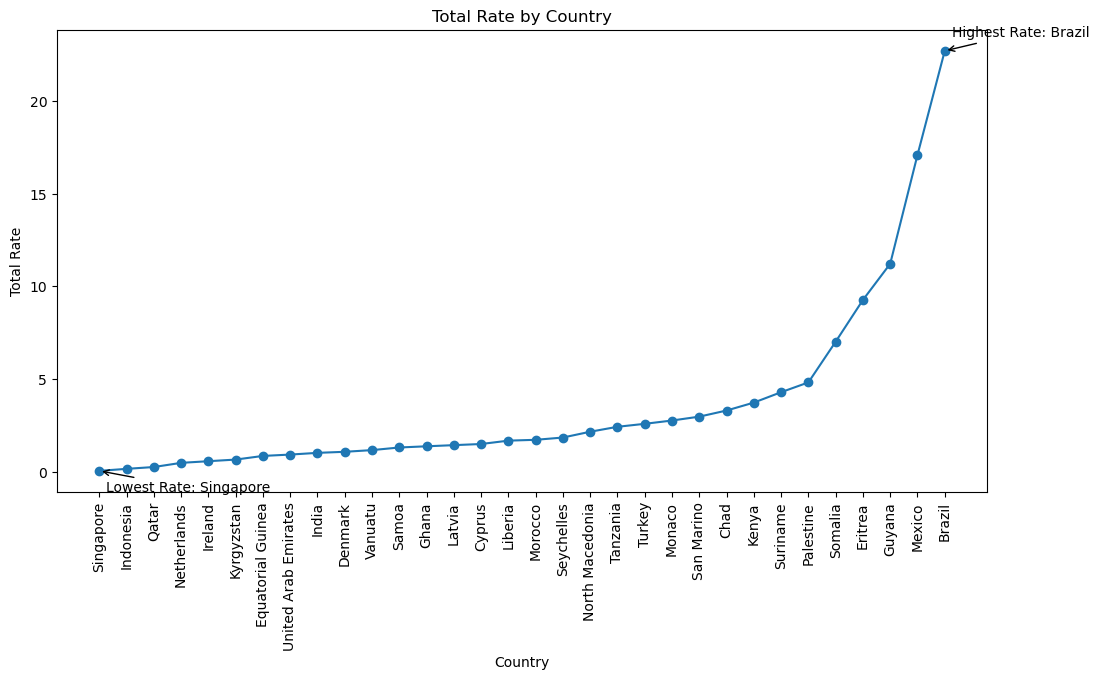

In [96]:
filtered_df = merged_df.dropna(subset=['totalRate']).sort_values('totalRate').iloc[::6]

# Get the country with the lowest and highest total rate
lowest_rate_country = filtered_df['country'].iloc[0]
highest_rate_country = filtered_df['country'].iloc[-1]

# Plot the Total Rate by country
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['country'], filtered_df['totalRate'], marker='o')
plt.xlabel('Country')
plt.ylabel('Total Rate')
plt.title('Total Rate by Country')
plt.xticks(rotation=90)

# Add annotations for the lowest and highest rate countries
plt.annotate(f'Lowest Rate: {lowest_rate_country}', xy=(lowest_rate_country, filtered_df['totalRate'].min()), xytext=(5, -15), textcoords='offset points', arrowprops=dict(arrowstyle='->'))
plt.annotate(f'Highest Rate: {highest_rate_country}', xy=(highest_rate_country, filtered_df['totalRate'].max()), xytext=(5, 10), textcoords='offset points', arrowprops=dict(arrowstyle='->'))

plt.show()


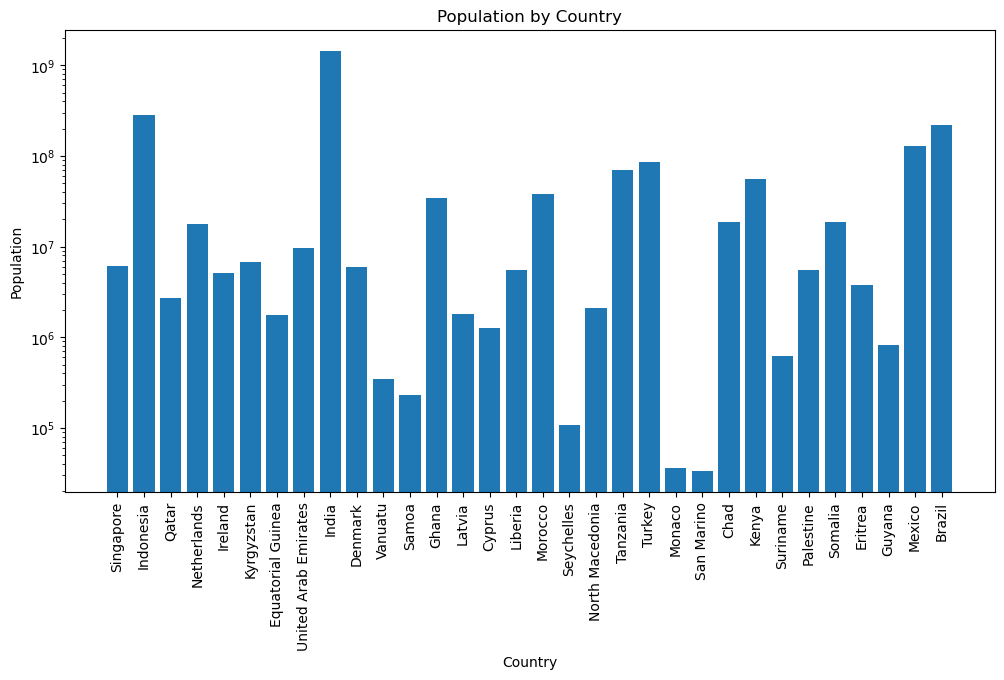

In [97]:
plt.figure(figsize=(12, 6))
plt.bar(filtered_df['country'], filtered_df['population'])
plt.xlabel('Country')
plt.ylabel('Population')
plt.title('Population by Country')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

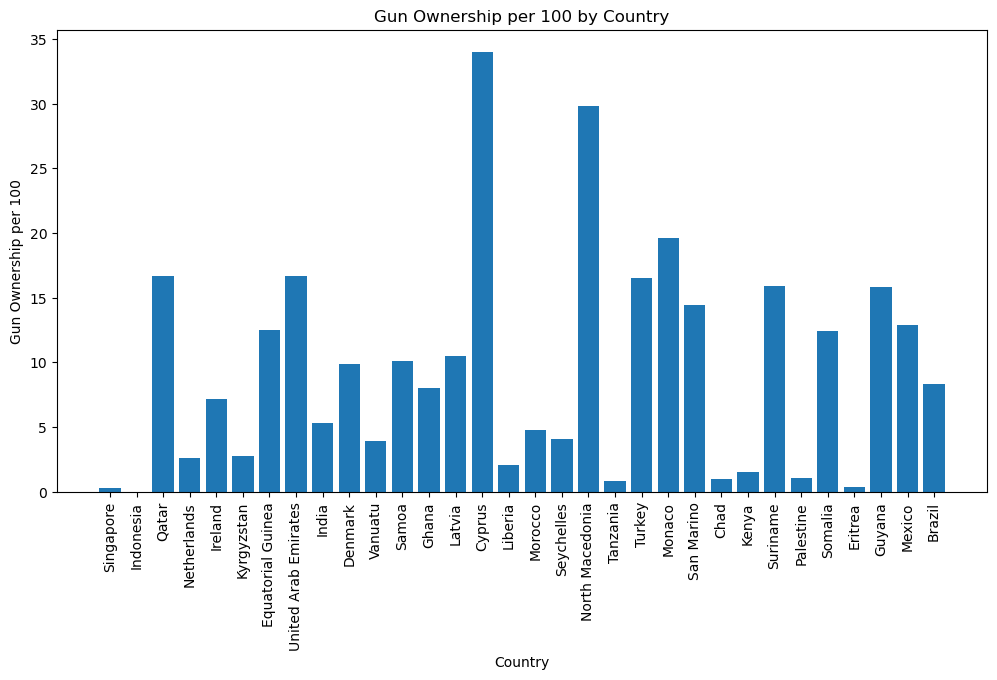

In [98]:
# Filter the dataframe to get the row for the specific country


# Plot the gunOwnershipByCountry_per100 column
plt.figure(figsize=(12, 6))
plt.bar(filtered_df['country'], filtered_df['gunOwnershipByCountry_per100'])
plt.xlabel('Country')
plt.ylabel('Gun Ownership per 100')
plt.title('Gun Ownership per 100 by Country')
plt.xticks(rotation=90)
plt.show()


In [99]:
merged_df.describe()


,GunDeathsAllCausesTotal2019,totalRate,shareOfDeaths,GunDeathsViolentTotal2019,GunDeathsViolentPct2019,GunDeathsViolentRatePer100k2019,gunViolenceByCountry_suicidesPer100k,gunOwnershipByCountry_firearms,gunOwnershipByCountry_per100,gunOwnershipByCountry_military,gunOwnershipByCountry_lawEnf,population
count,198.000000,192.000000,192.000000,197.000000,198.000000,198.000000,190.000000,1.980000e+02,198.000000,1.710000e+02,1.950000e+02,1.980000e+02
mean,1256.338384,4.065281,0.519270,893.253807,0.439596,2.891919,0.600000,4.319609e+06,9.566667,7.772719e+05,1.158233e+05,4.090424e+07
std,4927.627400,6.195870,2.003701,4028.039379,0.936275,5.751750,1.754209,2.876640e+07,12.365459,3.239236e+06,3.049965e+05,1.493181e+08
min,0.000000,0.049565,0.000401,0.000000,0.000000,0.010000,0.000000,1.000000e+02,0.000000,3.800000e+02,2.600000e+01,0.000000e+00
25%,28.250000,1.016569,0.012425,11.000000,0.030000,0.280000,0.000000,6.525000e+04,2.000000,2.295000e+04,5.000000e+03,1.878356e+06
50%,154.000000,1.723675,0.065530,46.000000,0.115000,0.780000,0.000000,3.460000e+05,5.550000,1.278400e+05,2.100000e+04,9.119418e+06
75%,505.250000,3.708531,0.219536,275.000000,0.355000,2.417500,1.000000,1.333500e+06,13.525000,4.414350e+05,7.600000e+04,3.069328e+07
max,49437.000000,36.177227,19.814111,47510.000000,5.720000,36.780000,22.000000,3.933470e+08,120.500000,3.027290e+07,2.432000e+06,1.441720e+09
